In [2]:
# importing import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore' )
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import prophet
from pmdarima.arima import auto_arima
import lightgbm as lgb

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator

In [3]:
df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\final_clean.csv")
test_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\test.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'holiday_type', 'locale', 'locale_name', 'description', 'transferred',
       'oil_price', 'city', 'state', 'store_type', 'cluster', 'transactions',
       'year', 'month', 'week', 'quarter', 'day_of_week'],
      dtype='object')

In [5]:
df.shape

(3054348, 22)

In [7]:
df1 = df.sample(1000000)

In [10]:
df1.reset_index(drop=True)

,Unnamed: 0,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,2483036,2016-10-04,29,HOME APPLIANCES,0.0,0,Holiday,National,Ecuador,Carnaval,...,Guayaquil,Guayas,E,10,1111.000000,2016,10,40,4,Tuesday
1,1802062,2015-09-27,21,SCHOOL AND OFFICE SUPPLIES,0.0,0,Holiday,National,Ecuador,Carnaval,...,Santo Domingo,Santo Domingo de los Tsachilas,B,6,1759.000000,2015,9,39,3,Sunday
2,799770,2014-03-21,49,HOME AND KITCHEN I,33.0,0,Holiday,National,Ecuador,Carnaval,...,Quito,Pichincha,A,11,2362.000000,2014,3,12,1,Friday
3,2607200,2016-12-12,13,BEAUTY,2.0,0,Holiday,National,Ecuador,Carnaval,...,Latacunga,Cotopaxi,C,15,877.000000,2016,12,50,4,Monday
4,258361,2013-05-24,9,BOOKS,0.0,0,Holiday,National,Ecuador,Batalla de Pichincha,...,Quito,Pichincha,B,6,2069.000000,2013,5,21,2,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2213812,2016-05-11,25,CLEANING,306.0,3,Event,National,Ecuador,Terremoto Manabi+25,...,Salinas,Santa Elena,D,1,701.000000,2016,5,19,2,Wednesday
999996,2488138,2016-10-07,22,BOOKS,0.0,0,Holiday,Local,Quevedo,Cantonizacion de Quevedo,...,Puyo,Pastaza,C,7,700.000000,2016,10,40,4,Friday
999997,2878095,2017-05-12,14,AUTOMOTIVE,1.0,0,Holiday,Local,Puyo,Cantonizacion del Puyo,...,Riobamba,Chimborazo,C,7,1283.000000,2017,5,19,2,Friday
999998,1504107,2015-04-16,12,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Carnaval,...,Latacunga,Cotopaxi,C,15,1697.071441,2015,4,16,2,Thursday


In [11]:
df1.to_csv("Final.csv", index= False)

In [12]:
df1

,Unnamed: 0,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
2483036,2483036,2016-10-04,29,HOME APPLIANCES,0.0,0,Holiday,National,Ecuador,Carnaval,...,Guayaquil,Guayas,E,10,1111.000000,2016,10,40,4,Tuesday
1802062,1802062,2015-09-27,21,SCHOOL AND OFFICE SUPPLIES,0.0,0,Holiday,National,Ecuador,Carnaval,...,Santo Domingo,Santo Domingo de los Tsachilas,B,6,1759.000000,2015,9,39,3,Sunday
799770,799770,2014-03-21,49,HOME AND KITCHEN I,33.0,0,Holiday,National,Ecuador,Carnaval,...,Quito,Pichincha,A,11,2362.000000,2014,3,12,1,Friday
2607200,2607200,2016-12-12,13,BEAUTY,2.0,0,Holiday,National,Ecuador,Carnaval,...,Latacunga,Cotopaxi,C,15,877.000000,2016,12,50,4,Monday
258361,258361,2013-05-24,9,BOOKS,0.0,0,Holiday,National,Ecuador,Batalla de Pichincha,...,Quito,Pichincha,B,6,2069.000000,2013,5,21,2,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213812,2213812,2016-05-11,25,CLEANING,306.0,3,Event,National,Ecuador,Terremoto Manabi+25,...,Salinas,Santa Elena,D,1,701.000000,2016,5,19,2,Wednesday
2488138,2488138,2016-10-07,22,BOOKS,0.0,0,Holiday,Local,Quevedo,Cantonizacion de Quevedo,...,Puyo,Pastaza,C,7,700.000000,2016,10,40,4,Friday
2878095,2878095,2017-05-12,14,AUTOMOTIVE,1.0,0,Holiday,Local,Puyo,Cantonizacion del Puyo,...,Riobamba,Chimborazo,C,7,1283.000000,2017,5,19,2,Friday
1504107,1504107,2015-04-16,12,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Carnaval,...,Latacunga,Cotopaxi,C,15,1697.071441,2015,4,16,2,Thursday


In [14]:
df1.isnull().sum()

Unnamed: 0        0
date              0
store_nbr         0
family            0
sales             0
onpromotion       0
holiday_type      0
locale            0
locale_name       0
description       0
transferred       0
oil_price       580
city              0
state             0
store_type        0
cluster           0
transactions      0
year              0
month             0
week              0
quarter           0
day_of_week       0
dtype: int64

In [4]:
df["date"] = pd.to_datetime(df['date'])

In [5]:
fe_drop = ['Unnamed: 0','locale', 'locale_name', 'description', 'transferred','city', 'state','year', 'month', 'week', 'quarter', 'day_of_week']
df = df.drop(columns=fe_drop)

In [6]:
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,oil_price,store_type,cluster,transactions
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,NaN,D,13,1697.071441
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,NaN,D,13,1697.071441
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,NaN,D,13,1697.071441
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,NaN,D,13,1697.071441
4,2013-01-01,1,BOOKS,0.0,0,Holiday,NaN,D,13,1697.071441


In [7]:
df.isna().sum()

date               0
store_nbr          0
family             0
sales              0
onpromotion        0
holiday_type       0
oil_price       1782
store_type         0
cluster            0
transactions       0
dtype: int64

In [8]:
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)

In [9]:
# Converting holiday_types in numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['holiday_type'] = le.fit_transform(df['holiday_type'])
df['store_type'] = le.fit_transform(df['store_type'])

# Select features for FE and EDA
**'sales', 'holiday_type', 'onpromotion','store_type','store_nbr'**

In [10]:
daily_sales = df.groupby('date')[['sales', 'holiday_type', 'onpromotion','store_type','store_nbr']].sum()
daily_sales['oil_price'] = df.groupby('date')['oil_price'].mean()
daily_sales.head()

,sales,holiday_type,onpromotion,store_type,store_nbr,oil_price
date,,,,,,
2013-01-02,496092.417944,5346,0,3564,49005,93.140000
2013-01-03,361461.231124,5346,0,3564,49005,92.970000
2013-01-04,354459.677093,5346,0,3564,49005,93.120000
2013-01-05,477350.121229,8910,0,3564,49005,93.140006
2013-01-06,519695.401088,5346,0,3564,49005,93.179994


<AxesSubplot:>

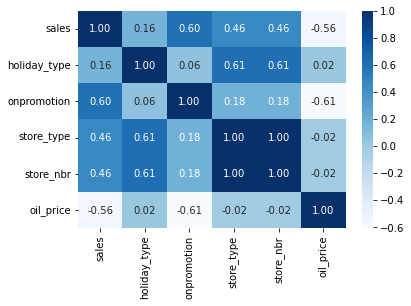

In [11]:
# Create a heat map
correlation_matrix = daily_sales.corr()

# Create a heat map of the correlation matrix
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt=".2f")

In [12]:
monthly_sales = daily_sales.resample('M').sum()
monthly_sales.head()

,sales,holiday_type,onpromotion,store_type,store_nbr,oil_price
date,,,,,,
2013-01-31,1.032511e+07,167508,0,106920,1470150,2842.730000
2013-02-28,9.658960e+06,149688,0,99792,1372140,2672.080000
2013-03-31,1.142850e+07,165726,0,110484,1519155,2890.360000
2013-04-30,1.099346e+07,160380,0,106920,1470150,2754.140000
2013-05-31,1.198556e+07,163944,0,114048,1568160,2935.749967


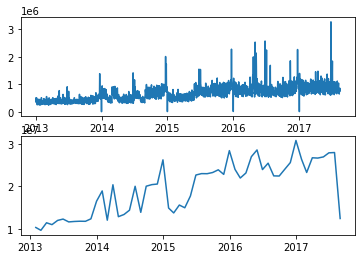

In [13]:
fig, axes = plt.subplots(2,1)
axes[0].plot(daily_sales['sales'])
axes[1].plot(monthly_sales['sales'])

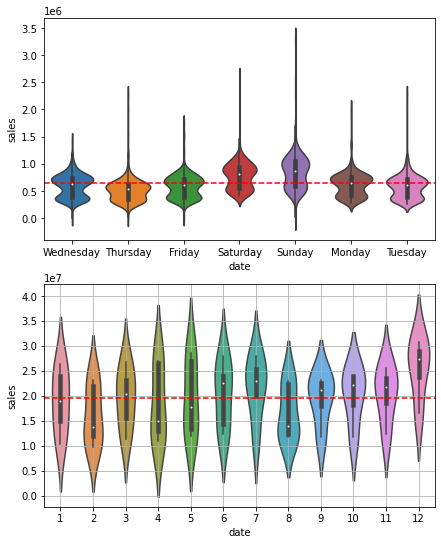

In [14]:

# violinplot of days of week and month to determine variance and range

days_of_week = daily_sales.index.day_name()

fig,axes = plt.subplots(2,1,figsize = (7, 9))
sns.violinplot(x=days_of_week, y=daily_sales['sales'], ax=axes[0])
axes[0].axhline(daily_sales['sales'].mean(), color='red', linestyle='--')

sns.violinplot(x=monthly_sales.index.month, y=monthly_sales['sales'], ax = axes[1])
axes[1].axhline(monthly_sales['sales'].mean(), color='red', linestyle='--')
plt.grid(True)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
ts = daily_sales['sales']
# assuming your time series data is stored in a variable called 'ts'
result = adfuller(ts)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.936750
p-value: 0.041238
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Text(0.5, 1.0, 'Residual Plot')

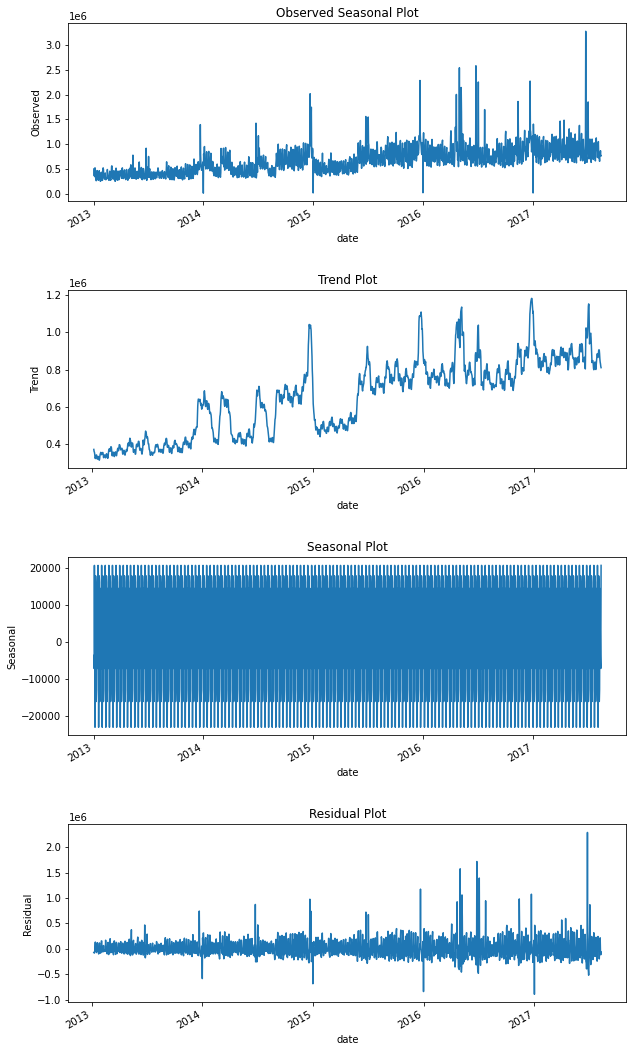

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# decompose the time series
decomposition = seasonal_decompose(daily_sales['sales'], model='additive', period=12)

# create a seasonal plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5) # added space between subplots

decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
axes[0].set_title('Observed Seasonal Plot')

decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
axes[1].set_title('Trend Plot')

decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Seasonal Plot')

decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
axes[3].set_title('Residual Plot')

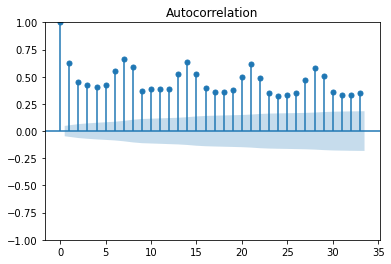

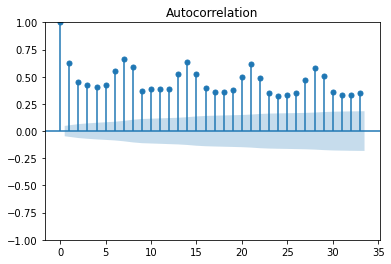

In [17]:
plot_acf(daily_sales['sales'], alpha = 0.05)

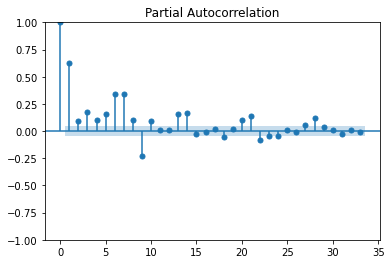

In [18]:
plot_pacf(daily_sales['sales'], alpha = 0.05);

# Using LSTM

# ARIMA

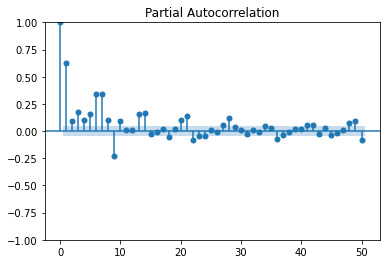

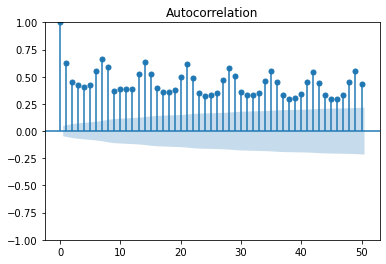

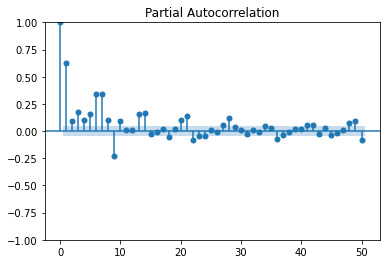

In [19]:
import statsmodels.api as sm

p = 1
d = 1
q = 1

train_np = daily_sales['sales'].values.astype('float64')
model = sm.tsa.ARIMA(train_np, order=(p, d, q))


# Define the order of differencing, AR, and MA terms
model_fit = model.fit()

# Plot ACF and PACF
plot_acf(train_np, lags=50)
plot_pacf(train_np, lags=50)

In [20]:
p = 1
d = 1
q = 1

# extract the target variable as a numpy array
train_np = daily_sales['sales'].values.astype('float64')

# fit the ARIMA model
model = sm.tsa.ARIMA(train_np, order=(p, d, q))

# train the ARIMA model
results = model.fit()

# print the summary of the trained model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1683
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -22903.485
Date:                Thu, 01 Jun 2023   AIC                          45812.970
Time:                        21:42:59   BIC                          45829.254
Sample:                             0   HQIC                         45819.002
                               - 1683                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3063      0.017     18.503      0.000       0.274       0.339
ma.L1         -0.9573      0.007   -128.663      0.000      -0.972      -0.943
sigma2      4.737e+10    9.8e-15   4.83e+24      0.0

In [21]:
# Make predictions
start_idx = len(train_np)
end_idx = len(train_np) + len(test_df) - 1
predictions = results.predict(start=start_idx, end=end_idx)
# Print the predictions
print(predictions)

[825489.66621345 844736.50695443 850632.64353124 ... 853236.58307666
 853236.58307666 853236.58307666]


In [22]:
actual_values = daily_sales['sales']

In [23]:
# Truncate or pad the predictions array to match the length of actual_values
predictions = predictions[:len(actual_values)]

# Calculate evaluation metrics
mae = np.mean(np.abs(predictions - actual_values))
mse = np.mean((predictions - actual_values) ** 2)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 279782.89115743287
Mean Squared Error (MSE): 116827984432.3757
Root Mean Squared Error (RMSE): 341801.08898652694


In [24]:
autocorr_values = daily_sales['sales'].autocorr()
print("Autocorrelation:", autocorr_values)

Autocorrelation: 0.6287690245062507


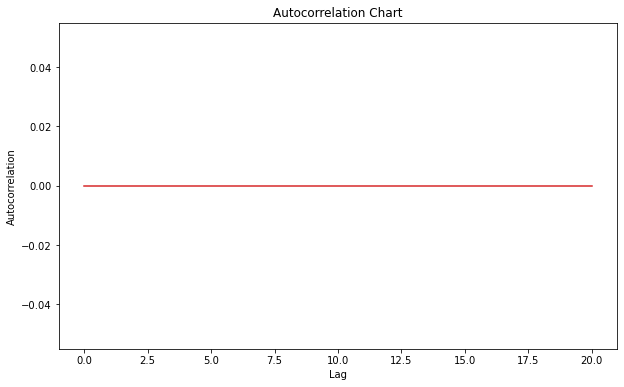

In [25]:
daily_sales['diff_sales'] = daily_sales['sales'] - daily_sales['sales'].shift(1)
# Compute the autocorrelation
autocorrelation = sm.tsa.acf(daily_sales['diff_sales'], nlags=20)

# Plot the autocorrelation chart
plt.figure(figsize=(10, 6))
plt.stem(range(len(autocorrelation)), autocorrelation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Chart')
plt.show()

In [26]:
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,) #call function adfuller 
    dfoutput = pd.Series(dftest[0:4],  
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    # display first 4 values with its name
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) #5th value is the CV
    
dftest(daily_sales.sales)

Test Statistic            -2.936750
p-value                    0.041238
Lags Used                 23.000000
Observations Used       1659.000000
Critical Value (1%)       -3.434298
Critical Value (5%)       -2.863284
Critical Value (10%)      -2.567698
dtype: float64


In [27]:
# define helper plot function for visualization

def plots(data, lags=None):
    plt.figure(figsize=(15, 4))
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data)
    plot_acf(data, lags=lags, ax=acf, zero=False)
    plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

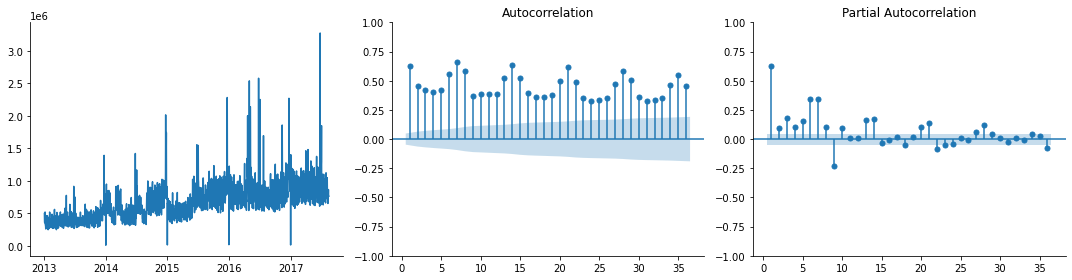

In [28]:
plots(daily_sales['sales'], lags = 36)

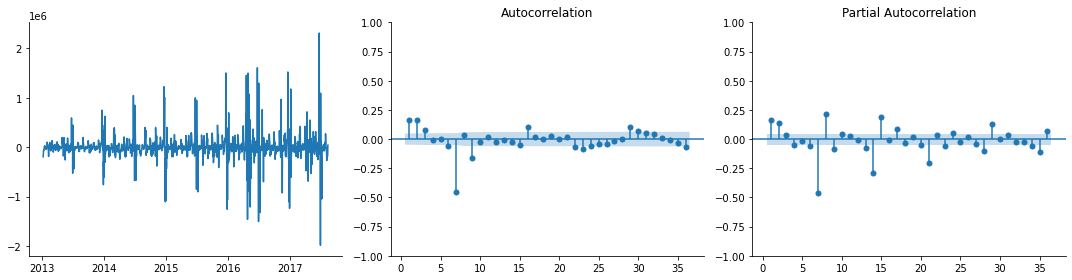

In [29]:
daily_sales['weekly_diff'] = daily_sales['sales'].diff(7)
plots(daily_sales.weekly_diff.dropna(), lags=36)

In [30]:
dftest(daily_sales.weekly_diff.dropna())

Test Statistic         -1.076463e+01
p-value                 2.470619e-19
Lags Used               2.300000e+01
Observations Used       1.652000e+03
Critical Value (1%)    -3.434315e+00
Critical Value (5%)    -2.863291e+00
Critical Value (10%)   -2.567702e+00
dtype: float64


# SARIMAX

In [31]:
#from pyramid.arima import auto_arima
stepwise_model = pm.auto_arima(daily_sales['sales'], 
                               exog=daily_sales[[ 'holiday_type', 'onpromotion','store_type','store_nbr']],
                            start_p=2, start_q=0,
                           max_p=3, max_q=2, m=7, # p,q = 1, 2, 3 
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=45355.439, Time=1.05 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=46081.131, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=45649.171, Time=0.94 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=45411.424, Time=0.87 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=46079.221, Time=0.09 sec
 ARIMA(2,0,0)(0,1,0)[7] intercept   : AIC=46007.094, Time=0.38 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=45356.319, Time=1.46 sec
 ARIMA(2,0,0)(0,1,2)[7] intercept   : AIC=45356.430, Time=2.33 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=45630.235, Time=0.95 sec
 ARIMA(2,0,0)(1,1,2)[7] intercept   : AIC=45359.133, Time=2.14 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=45380.041, Time=0.92 sec
 ARIMA(3,0,0)(0,1,1)[7] intercept   : AIC=45344.111, Time=1.40 sec
 ARIMA(3,0,0)(0,1,0)[7] intercept   : AIC=46007.232, Time=0.56 sec
 ARIMA(3,0,0)(1,1,1)[7] intercept   : AIC=45345.767, Time=2.07 sec
 ARIMA(3,0,0)(0,1,2

In [32]:
order = stepwise_model.order
seasonal_order = stepwise_model.seasonal_order
print('order: ',order)
print('seasonal order: ',seasonal_order)

order:  (2, 0, 1)
seasonal order:  (0, 1, 1, 7)


In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit SARIMA based on helper plots
sar = SARIMAX(daily_sales['sales'], 
              exog=daily_sales[['holiday_type', 'onpromotion','store_type','store_nbr']], #Exclude  'transactions'
                order=order,
                seasonal_order=seasonal_order, #(P, Q, D)
                trend='c').fit()
sar.summary()

C:\Users\Sumeet Maheshwari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sumeet Maheshwari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             sales   No. Observations:                 1683
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 7)   Log Likelihood              -21777.801
Date:                           Thu, 01 Jun 2023   AIC                          43575.601
Time:                                   21:46:39   BIC                          43629.843
Sample:                                        0   HQIC                         43595.696
                                          - 1683                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        3.2395    597.059      0.005      0.996   -1166.975    1173.454
holiday_type   -15.8886      2.680     -5.928      0.000     -21.142     -10.635
onpromotion     34.4864      0.910     37.911      0.000      32.703      36.269
store_type       0.8930      0.021     42.994      0.000       0.852       0.934
store_nbr       12.2775      0.286     42.992      0.000      11.718      12.837
ar.L1            0.9141      0.127      7.194      0.000       0.665       1.163
ar.L2           -0.0981      0.074     -1.329      0.184      -0.243       0.047
ma.L1           -0.4913      0.128     -3.833      0.000      -0.743      -0.240
ma.S.L7         -0.7137      0.018    -39.417      0.000      -0.749      -0.678
sigma2        1.571e+10      0.000   7.53e+13      0.000    1.57e+10    1.57e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8966.42
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.59e+29. Standard errors may be unstable.
"""

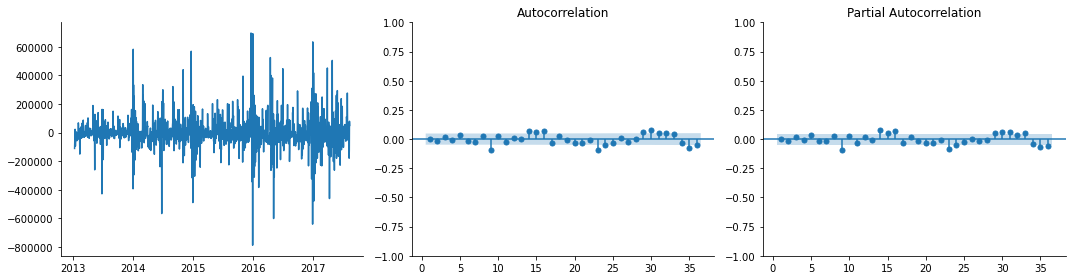

In [34]:
plots(sar.resid[sar.loglikelihood_burn:], lags=36)

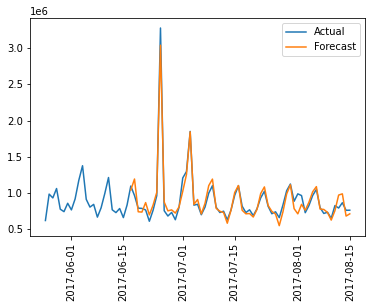

In [35]:
# Select the last 60 days of data for comparison
last_60_days = daily_sales.iloc[-60:]

# Extract the exogenous variables for the last 60 days
exog_data = last_60_days[['holiday_type', 'onpromotion','store_type','store_nbr']]

# Get the forecast for the next 60 days, including exogenous variables
forecast = sar.get_prediction(start=last_60_days.index[0], end=last_60_days.index[-1], exog=exog_data)

# Extract the predicted values for the next 60 days
predicted_values = forecast.predicted_mean

# Plot the actual sales and predicted values
plt.plot(daily_sales[1600:]['sales'], label = 'Actual')
plt.plot(predicted_values.index, predicted_values, label='Forecast')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Using LightGBM

In [36]:
for col in ['family']:
    df[col] = df[col].astype('category').cat.codes
    test_df[col] = test_df[col].astype('category').cat.codes

In [37]:
X = df.drop(['date', 'sales'], axis=1)
y = df['sales']


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [39]:
# LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train_log)

# hyperparameters for LightGBM model
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'feature_fraction': 0.8,
    'lambda_l1': 0.0,
    'lambda_l2': 0.0,
    'min_gain_to_split': 0.0,
    'min_sum_hessian_in_leaf': 1e-3}

In [40]:
# Training
lgb_model = lgb.train(params, 
                      train_data, 
                      num_boost_round=1000, 
                      valid_sets=[train_data], 
                      early_stopping_rounds=50, 
                      verbose_eval=100)

# Predictions
y_val_pred = lgb_model.predict(X_val)
y_val_pred = np.clip(y_val_pred, 0, None)
test_pred = lgb_model.predict(X_val) 

# Inverse log1p transformation
test_sales = np.expm1(test_pred)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 2442052, number of used features: 8
[LightGBM] [Info] Start training from score 2.931569
Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.801857
[200]	training's rmse: 0.75069
[300]	training's rmse: 0.729132
[400]	training's rmse: 0.714806
[500]	training's rmse: 0.70461
[600]	training's rmse: 0.694733
[700]	training's rmse: 0.68718
[800]	training's rmse: 0.680839
[900]	training's rmse: 0.675538
[1000]	training's rmse: 0.67078
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.67078


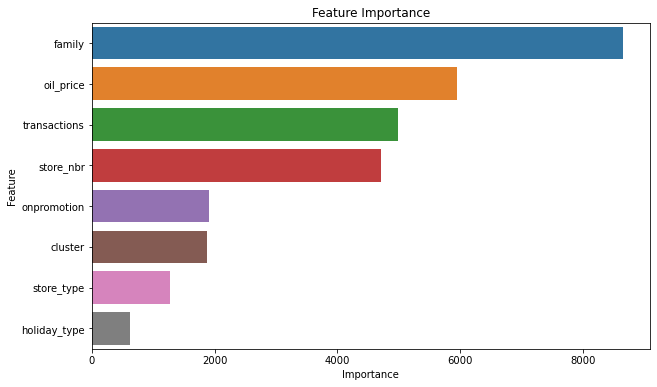

In [41]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': lgb_model.feature_importance()})
feature_importance = feature_importance.sort_values('importance', ascending=False)
feature_names = X.columns.tolist()



plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [42]:
from sklearn.preprocessing import MinMaxScaler 
#Split the data into train and test sets

# Define the features and target variable
X = df.drop(['date', 'sales'], axis=1)
y= df['sales']

from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Comparing Xboost and ARIMA

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define the XGBoost model
model_xg = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    min_child_weight=1,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8, 
)

# Define the ARIMA model
model_ar = ARIMA(y_train, order=(2, 0, 0))

# Fit the models
model_xg.fit(X_train, y_train)
model_ar = model_ar.fit()  

# Make predictions
predictions_xg = model_xg.predict(X_test)
predictions_ar = model_ar.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)  

# Calculate the mean squared error
mse_xg = mean_squared_error(y_test, predictions_xg)
mse_ar = mean_squared_error(y_test, predictions_ar)

C:\Users\Sumeet Maheshwari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sumeet Maheshwari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sumeet Maheshwari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[21:47:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sumeet Maheshwari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [59]:
print(mse_xg)
print(mse_ar)

176439.0075940359
1226541.9349389172
